In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from pyclustering.cluster.kmedoids import kmedoids

In [16]:
# Load the data
df = pd.read_csv('/Users/yeshwanthsatyadev/Desktop/wine.csv')

In [17]:
# Separate features and target
X = df.drop('Type', axis=1)
y = df['Type']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Perform PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [19]:
# KMeans clustering with silhouette score
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_scores.append(silhouette_score(X_pca, cluster_labels))

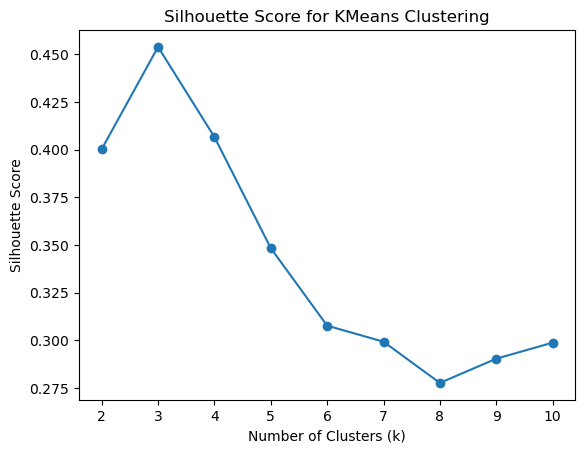

In [20]:
# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for KMeans Clustering')
plt.show()

In [21]:
# Find the optimal number of clusters using the elbow method
# (where the silhouette score is maximum)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters (KMeans): {optimal_k}')

Optimal number of clusters (KMeans): 3


In [22]:
# Hierarchical clustering with linkage
linkage_methods = ['ward', 'complete', 'average', 'single']
best_silhouette_score = float('-inf')
best_linkage = None

for linkage_method in linkage_methods:
    hc = AgglomerativeClustering(n_clusters=optimal_k, linkage=linkage_method)
    cluster_labels = hc.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_linkage = linkage_method

print(f'Optimal linkage method: {best_linkage}')

Optimal linkage method: ward


In [27]:
# KMedoids clustering
# Use KMeans clustering to get initial medoid indices
kmeans_for_medoids = KMeans(n_clusters=optimal_k, random_state=42)
initial_medoid_labels = kmeans_for_medoids.fit_predict(X_pca)
initial_medoid_indices = [X_pca[initial_medoid_labels == i].mean(axis=0)[0] for i in range(optimal_k)]

# Convert initial_medoid_indices to integers
initial_medoid_indices = [int(i) for i in initial_medoid_indices]

kmedoids_instance = kmedoids(X_pca, initial_index_medoids=initial_medoid_indices, tolerance=0.25, ccore=True)
kmedoids_instance.process()
cluster_labels_kmedoids = kmedoids_instance.get_clusters()

# Print cluster labels for KMedoids
print("Cluster labels for KMedoids:")
for i, cluster in enumerate(cluster_labels_kmedoids):
    print(f'Cluster {i + 1}: {cluster}')

Cluster labels for KMedoids:
Cluster 1: [59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 72, 74, 75, 76, 77, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129]
Cluster 2: [83, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177]
Cluster 3: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 69, 71, 73, 78, 95, 98, 121]


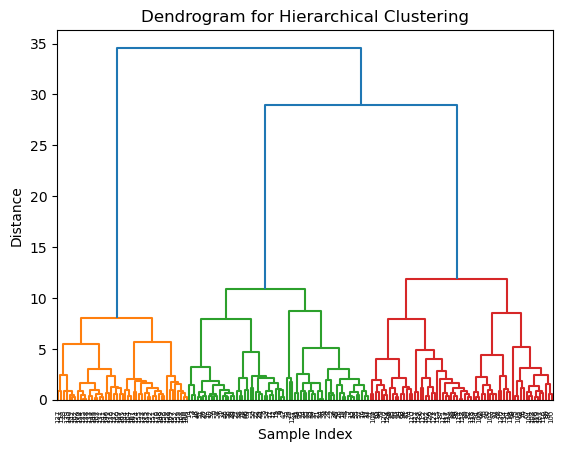

In [28]:
# Plot dendrogram for hierarchical clustering
linkage_matrix = linkage(X_pca, method=best_linkage)
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()